In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds


datos, metadatos = tfds.load ('cats_vs_dogs', as_supervised=True, with_info=True)

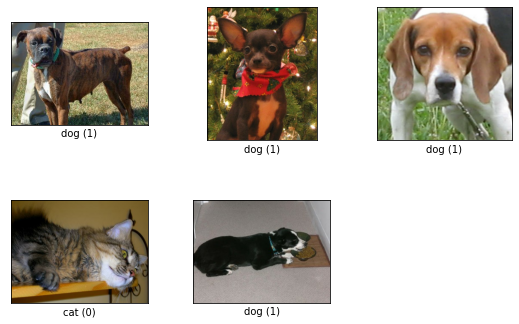

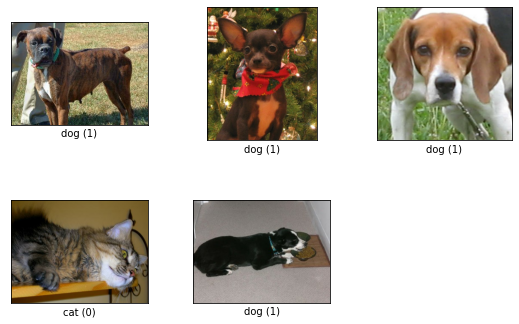

In [16]:
#Es para ver las imagenes y etiquetas :)
tfds.show_examples(datos['train'].take (5), metadatos)

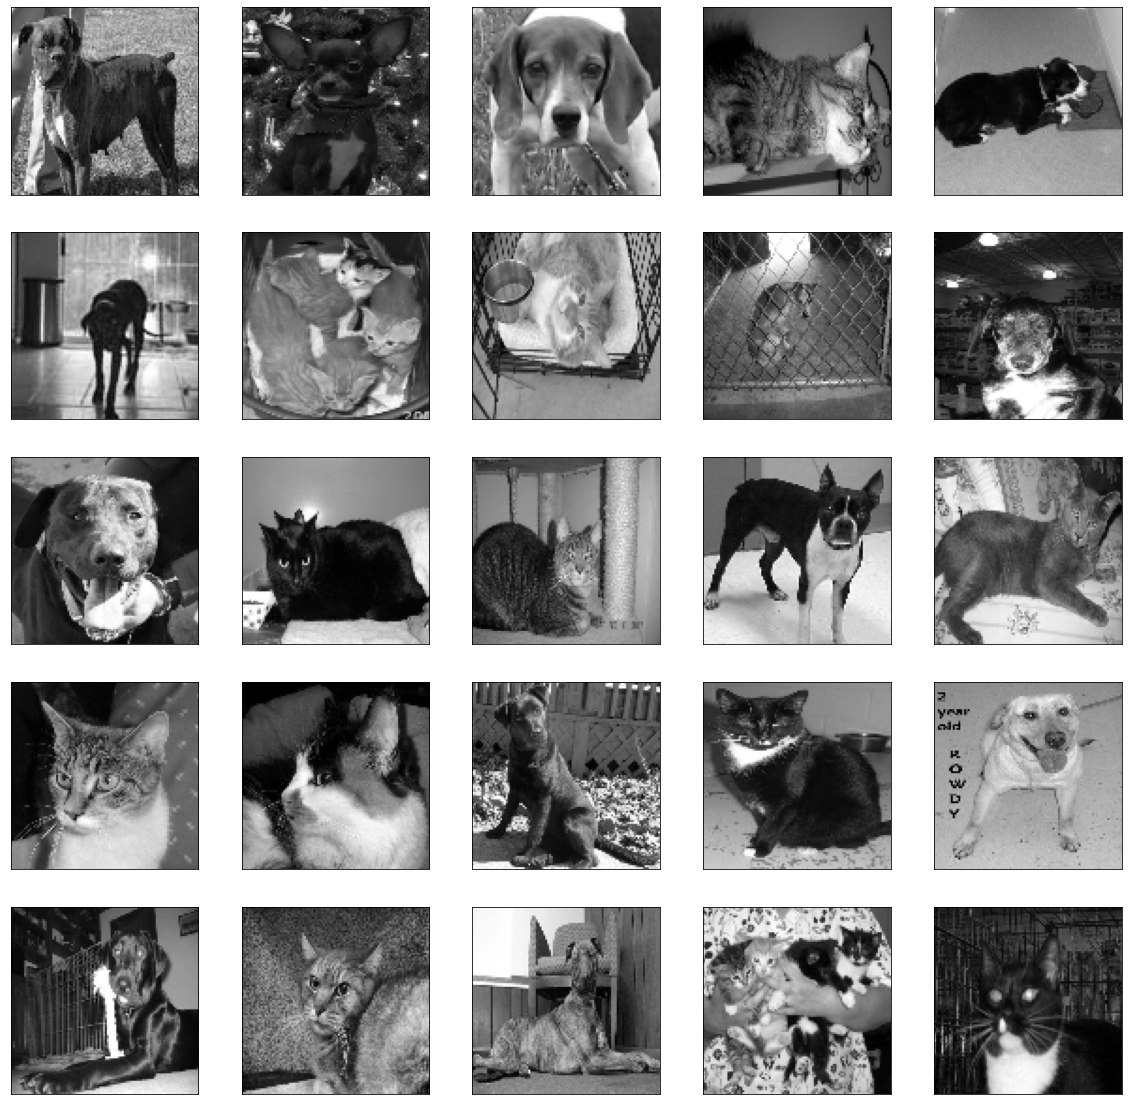

In [18]:
#Es para ver las imagenes :)
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [19]:
datos_entrenamiento = []

In [20]:
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1 
  datos_entrenamiento.append([imagen, etiqueta])

In [21]:
datos_entrenamiento[0]

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [22]:
len(datos_entrenamiento)

23262

In [26]:
X = [] 
y = []

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [27]:
import numpy as np

X = np.array(X).astype(float) / 255

In [28]:
X

array([[[[0.94901961],
         [0.74509804],
         [0.41176471],
         ...,
         [0.74117647],
         [0.76470588],
         [0.56078431]],

        [[0.90196078],
         [0.50980392],
         [0.34509804],
         ...,
         [0.7372549 ],
         [0.70196078],
         [0.73333333]],

        [[0.66666667],
         [0.36470588],
         [0.32941176],
         ...,
         [0.51372549],
         [0.61960784],
         [0.65882353]],

        ...,

        [[0.43921569],
         [0.67843137],
         [0.64313725],
         ...,
         [0.55294118],
         [0.59607843],
         [0.46666667]],

        [[0.54901961],
         [0.59215686],
         [0.6745098 ],
         ...,
         [0.37647059],
         [0.58823529],
         [0.59607843]],

        [[0.36078431],
         [0.43921569],
         [0.65882353],
         ...,
         [0.17254902],
         [0.20392157],
         [0.18431373]]],


       [[[0.57254902],
         [0.45098039],
         [0.36

In [29]:
import numpy as np

y = np.array(y)

In [30]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [31]:
#x.shape   #PARA ASEGURAR QUE NO SE FRESE :)

In [32]:
modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import TensorBoard

In [36]:
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modeloDenso.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardDenso])

Epoch 1/100
618/618 [==============================] - 2s 3ms/step - loss: 0.6574 - accuracy: 0.6085 - val_loss: 0.6725 - val_accuracy: 0.5834
Epoch 2/100
618/618 [==============================] - 2s 3ms/step - loss: 0.6550 - accuracy: 0.6137 - val_loss: 0.6812 - val_accuracy: 0.5819
Epoch 3/100
618/618 [==============================] - 2s 3ms/step - loss: 0.6583 - accuracy: 0.6088 - val_loss: 0.6702 - val_accuracy: 0.5943
Epoch 4/100
618/618 [==============================] - 2s 3ms/step - loss: 0.6564 - accuracy: 0.6126 - val_loss: 0.6667 - val_accuracy: 0.5940
Epoch 5/100
618/618 [==============================] - 2s 3ms/step - loss: 0.6536 - accuracy: 0.6154 - val_loss: 0.6683 - val_accuracy: 0.5874
Epoch 6/100
618/618 [==============================] - 2s 3ms/step - loss: 0.6529 - accuracy: 0.6142 - val_loss: 0.6777 - val_accuracy: 0.5805
Epoch 7/100
618/618 [==============================] - 2s 3ms/step - loss: 0.6509 - accuracy: 0.6152 - val_loss: 0.6678 - val_accuracy: 0.5957

In [37]:
%load_ext tensorboard

In [38]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 1107), started 0:51:18 ago. (Use '!kill 1107' to kill it.)

In [39]:
tensorboardCNN = TensorBoard(log_dir='logs/cnn')
modeloCNN.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN])

Epoch 1/100
618/618 [==============================] - 14s 14ms/step - loss: 0.6045 - accuracy: 0.6540 - val_loss: 0.5014 - val_accuracy: 0.7542
Epoch 2/100
618/618 [==============================] - 7s 11ms/step - loss: 0.4677 - accuracy: 0.7794 - val_loss: 0.4581 - val_accuracy: 0.7693
Epoch 3/100
618/618 [==============================] - 7s 11ms/step - loss: 0.4038 - accuracy: 0.8170 - val_loss: 0.4111 - val_accuracy: 0.8083
Epoch 4/100
618/618 [==============================] - 7s 11ms/step - loss: 0.3456 - accuracy: 0.8479 - val_loss: 0.3653 - val_accuracy: 0.8341
Epoch 5/100
618/618 [==============================] - 7s 11ms/step - loss: 0.2951 - accuracy: 0.8737 - val_loss: 0.3781 - val_accuracy: 0.8352
Epoch 6/100
618/618 [==============================] - 7s 11ms/step - loss: 0.2448 - accuracy: 0.8990 - val_loss: 0.3805 - val_accuracy: 0.8338
Epoch 7/100
618/618 [==============================] - 7s 11ms/step - loss: 0.1973 - accuracy: 0.9191 - val_loss: 0.3804 - val_accuracy

In [40]:
tensorboardCNN2 = TensorBoard(log_dir='logs/cnn2')
modeloCNN2.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardCNN2])

Epoch 1/100
618/618 [==============================] - 9s 13ms/step - loss: 0.6045 - accuracy: 0.6637 - val_loss: 0.5212 - val_accuracy: 0.7453
Epoch 2/100
618/618 [==============================] - 7s 12ms/step - loss: 0.4920 - accuracy: 0.7639 - val_loss: 0.4541 - val_accuracy: 0.7788
Epoch 3/100
618/618 [==============================] - 7s 12ms/step - loss: 0.4321 - accuracy: 0.7999 - val_loss: 0.4578 - val_accuracy: 0.7805
Epoch 4/100
618/618 [==============================] - 7s 12ms/step - loss: 0.3882 - accuracy: 0.8250 - val_loss: 0.4047 - val_accuracy: 0.8155
Epoch 5/100
618/618 [==============================] - 7s 12ms/step - loss: 0.3523 - accuracy: 0.8434 - val_loss: 0.3746 - val_accuracy: 0.8338
Epoch 6/100
618/618 [==============================] - 7s 12ms/step - loss: 0.3180 - accuracy: 0.8612 - val_loss: 0.3423 - val_accuracy: 0.8533
Epoch 7/100
618/618 [==============================] - 7s 12ms/step - loss: 0.2796 - accuracy: 0.8785 - val_loss: 0.3611 - val_accuracy:

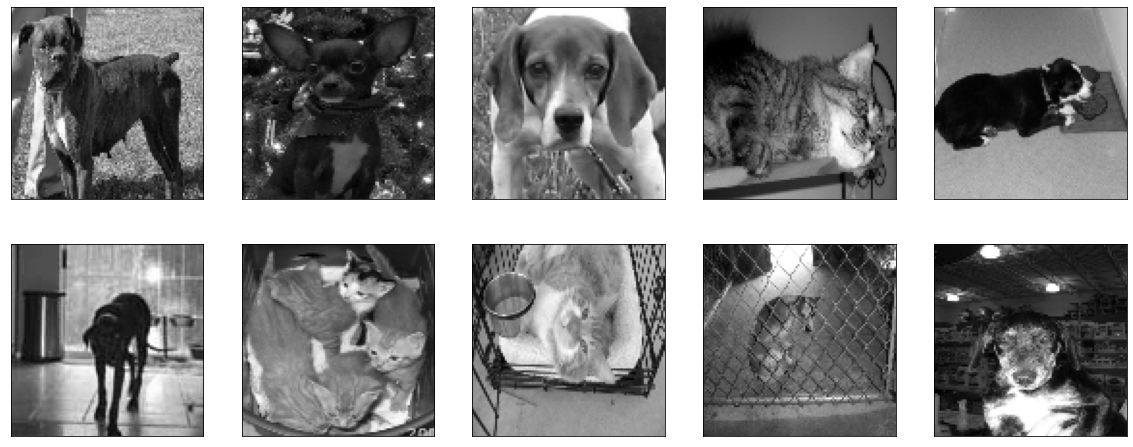

In [41]:
plt.figure(figsize=(20, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

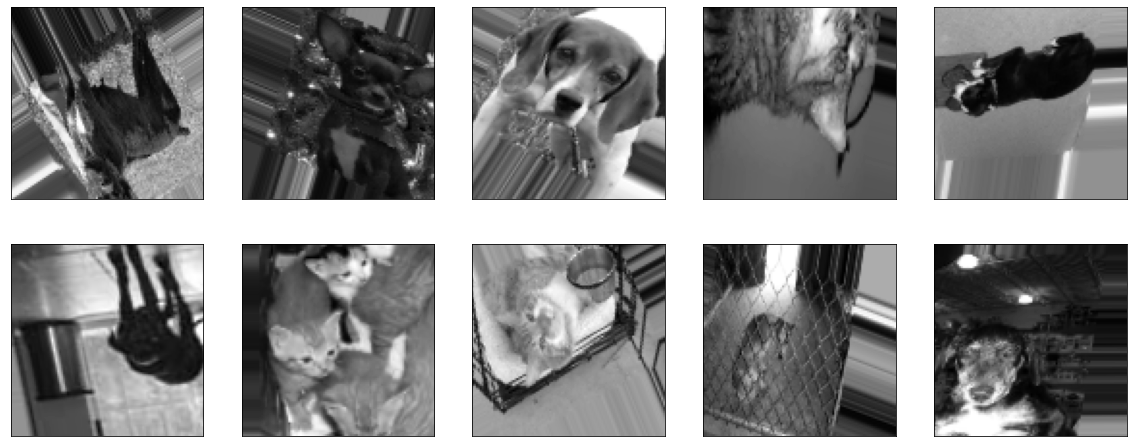

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [44]:
modeloDenso_AD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [45]:
modeloDenso_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [46]:
len(X) * .85 #19700
len(X) - 19700 #3562

X_entrenamiento = X[:19700]
X_validacion = X[19700:]

y_entrenamiento = y[:19700]
y_validacion = y[19700:]

In [47]:
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [48]:
tensorboardDenso_AD = TensorBoard(log_dir='logs/denso_AD')

modeloDenso_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardDenso_AD]
)

Epoch 1/100
616/616 [==============================] - 20s 32ms/step - loss: 0.7403 - accuracy: 0.5154 - val_loss: 0.6906 - val_accuracy: 0.5497
Epoch 2/100
616/616 [==============================] - 19s 30ms/step - loss: 0.6905 - accuracy: 0.5310 - val_loss: 0.6940 - val_accuracy: 0.5227
Epoch 3/100
616/616 [==============================] - 19s 30ms/step - loss: 0.6893 - accuracy: 0.5307 - val_loss: 0.6907 - val_accuracy: 0.5275
Epoch 4/100
616/616 [==============================] - 19s 30ms/step - loss: 0.6910 - accuracy: 0.5269 - val_loss: 0.6921 - val_accuracy: 0.5093
Epoch 5/100
616/616 [==============================] - 19s 30ms/step - loss: 0.6926 - accuracy: 0.5024 - val_loss: 0.6920 - val_accuracy: 0.5079
Epoch 6/100
616/616 [==============================] - 19s 30ms/step - loss: 0.6939 - accuracy: 0.5054 - val_loss: 0.6933 - val_accuracy: 0.5020
Epoch 7/100
616/616 [==============================] - 19s 30ms/step - loss: 0.6921 - accuracy: 0.5106 - val_loss: 0.6925 - val_ac

In [49]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=150, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)

Epoch 1/150
616/616 [==============================] - 21s 34ms/step - loss: 0.6891 - accuracy: 0.5365 - val_loss: 0.6829 - val_accuracy: 0.5536
Epoch 2/150
616/616 [==============================] - 20s 32ms/step - loss: 0.6805 - accuracy: 0.5677 - val_loss: 0.6699 - val_accuracy: 0.5862
Epoch 3/150
616/616 [==============================] - 20s 32ms/step - loss: 0.6683 - accuracy: 0.5898 - val_loss: 0.6439 - val_accuracy: 0.6334
Epoch 4/150
616/616 [==============================] - 20s 32ms/step - loss: 0.6497 - accuracy: 0.6213 - val_loss: 0.6819 - val_accuracy: 0.5896
Epoch 5/150
616/616 [==============================] - 20s 32ms/step - loss: 0.6370 - accuracy: 0.6363 - val_loss: 0.6986 - val_accuracy: 0.5904
Epoch 6/150
616/616 [==============================] - 20s 32ms/step - loss: 0.6229 - accuracy: 0.6525 - val_loss: 0.5858 - val_accuracy: 0.6895
Epoch 7/150
616/616 [==============================] - 20s 32ms/step - loss: 0.6116 - accuracy: 0.6640 - val_loss: 0.5701 - val_ac

In [50]:
tensorboardCNN2_AD = TensorBoard(log_dir='logs/cnn2_AD')

modeloCNN2_AD.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN2_AD]
)

Epoch 1/100
616/616 [==============================] - 21s 34ms/step - loss: 0.6818 - accuracy: 0.5589 - val_loss: 0.6792 - val_accuracy: 0.5674
Epoch 2/100
616/616 [==============================] - 20s 32ms/step - loss: 0.6603 - accuracy: 0.6054 - val_loss: 0.6359 - val_accuracy: 0.6429
Epoch 3/100
616/616 [==============================] - 20s 32ms/step - loss: 0.6450 - accuracy: 0.6246 - val_loss: 0.6438 - val_accuracy: 0.6457
Epoch 4/100
616/616 [==============================] - 20s 32ms/step - loss: 0.6363 - accuracy: 0.6386 - val_loss: 0.6036 - val_accuracy: 0.6763
Epoch 5/100
616/616 [==============================] - 20s 32ms/step - loss: 0.6195 - accuracy: 0.6561 - val_loss: 0.5656 - val_accuracy: 0.7170
Epoch 6/100
616/616 [==============================] - 20s 32ms/step - loss: 0.6073 - accuracy: 0.6699 - val_loss: 0.5929 - val_accuracy: 0.6727
Epoch 7/100
616/616 [==============================] - 20s 32ms/step - loss: 0.5999 - accuracy: 0.6778 - val_loss: 0.5630 - val_ac

In [ ]:
modeloCNN_AD.save('perros-gatos-cnn-ad.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras perros-gatos-cnn-ad.h5 carpeta_salida